In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

import os
print(os.listdir("input"))

['test.csv', 'train.csv']


In [ ]:
train = pd.read_csv("input/train.csv")
print(train.shape)
train.head()
train = train.iloc[:1000,:]

(42000, 785)


label       100
pixel0      100
pixel1      100
pixel2      100
pixel3      100
           ... 
pixel779    100
pixel780    100
pixel781    100
pixel782    100
pixel783    100
Length: 785, dtype: int64

In [ ]:
test = pd.read_csv("input/test.csv")
print(test.shape)
test.head()
train = train.iloc[:1000,:]

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

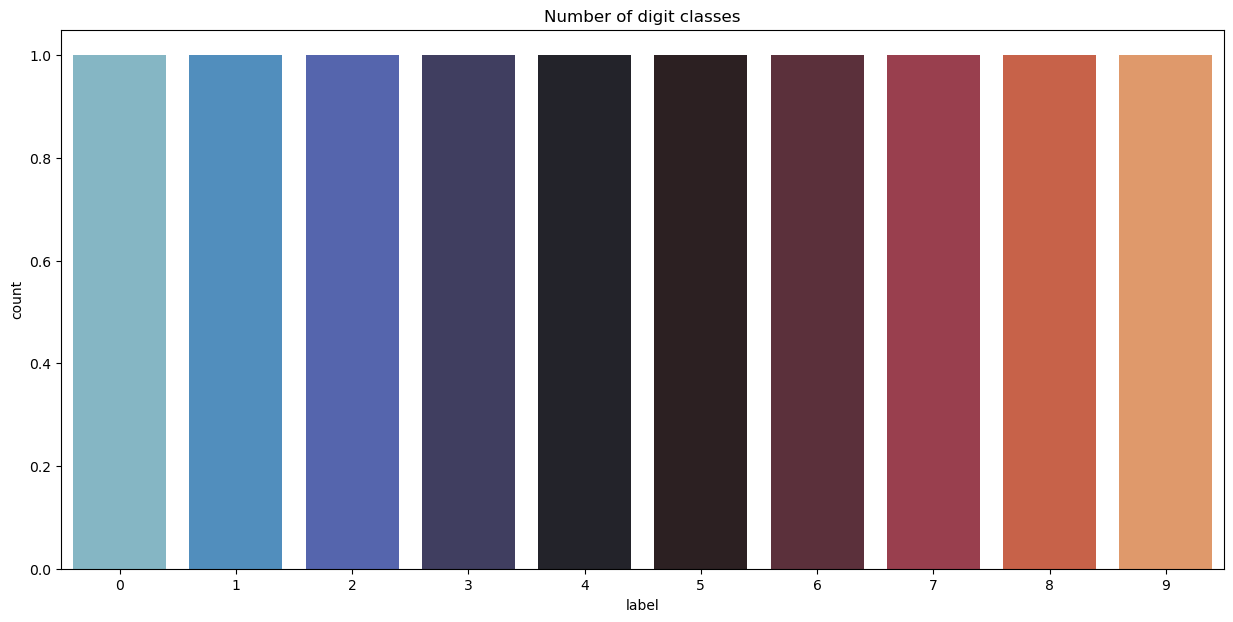

In [6]:
%matplotlib inline
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train.value_counts(), palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

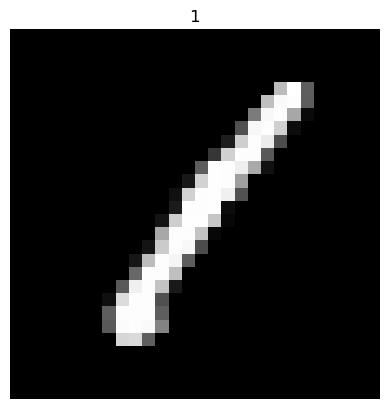

In [7]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
#print(img)
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [8]:
X_train = X_train / 255.0
test = test / 255.0
print("X_train shape: ", X_train.shape)
print("test shape:", test.shape)

X_train shape:  (42000, 784)
test shape: (28000, 784)


In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("X_train shape: ", X_train.shape)
print("test shape:", test.shape)

X_train shape:  (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


In [10]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)
print("Y_train shape: ", Y_train.shape)

Y_train shape:  (42000, 10)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_val shape: ", Y_val.shape)

X_train shape:  (37800, 28, 28, 1)
X_val shape:  (4200, 28, 28, 1)
Y_train shape:  (37800, 10)
Y_val shape:  (4200, 10)


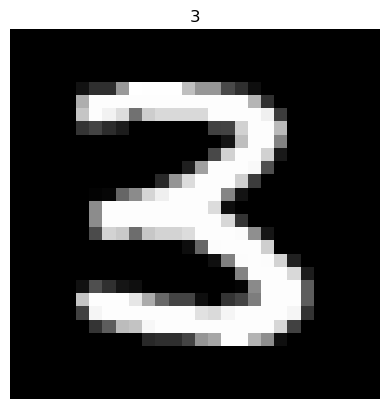

In [12]:
#print(X_train[39].shape)

plt.imshow(X_train[39][:,:,0], cmap='gray')
plt.title(np.argmax(Y_train[39]))
plt.axis("off")
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5, 5), padding = 'Same', 
                 activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2,2)))
model.add(Dropout(0.25))
#fully connected layers
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [14]:
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [15]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
epochs = 10
batch_size = 250

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

datagen.fit(X_train)

: 

In [ ]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


In [3]:
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()